# Project on Linear Regression 


### What is Linear Regression
linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables)

#### Project Dataset 

Concrete Compressive Strength Data Set

Content of the Project:-

The feature set includes:
Cement
Blast Furnace Slag
Fly Ash
Water
Super-plasticizer
Coarse Aggregate
Fine Aggregate
Age

The target set is:
Strength of the Cement

Importing few Libraries for the project

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling


In [2]:
# Here I'm setting the working directory
os.chdir(r'E:\mine\Data Mining\project\lin reg')
os.getcwd()

'E:\\mine\\Data Mining\\project\\lin reg'

In [3]:
#Here I'm reading the Dataset
dflin=pd.read_excel('Concrete_Data.xls',na_values='NA')

In [4]:
# this is the dimension of my dataset
dflin.shape

(1030, 9)

In [5]:
# the description of my Dataset
dflin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
# Here i'm renaming the column for better understanding of the column names
dflin.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement",
                     "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Blast Furnace Slag",
                     "Fly Ash (component 3)(kg in a m^3 mixture)":"Fly Ash",
                     "Water  (component 4)(kg in a m^3 mixture)":"Water ",
                     "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplasticizer",
                     "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse Aggregate",
                     "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine Aggregate",
                     "Age (day)":"Age",
                     "Concrete compressive strength(MPa, megapascals) ":"Concrete compressive strength"},inplace=True)


In [7]:
#rechecking the description my data
dflin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
dflin.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
dflin.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [10]:
#Column Names for easy refernces
dflin.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [37]:
#checking for missing values
dflin.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

There no missing values in the dataset

In [11]:
dflin.astype('object').describe().transpose()

,count,unique,top,freq
Cement,1030.0,280.0,425.000000,20.0
Blast Furnace Slag,1030.0,187.0,0.000000,466.0
Fly Ash,1030.0,163.0,0.000000,566.0
Water,1030.0,205.0,192.000000,118.0
Superplasticizer,1030.0,155.0,0.000000,379.0
Coarse Aggregate,1030.0,284.0,932.000000,57.0
Fine Aggregate,1030.0,304.0,755.800000,30.0
Age,1030.0,14.0,28.000000,425.0
Concrete compressive strength,1030.0,938.0,33.398217,5.0


In [12]:
dflin.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [14]:
dflin.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete compressive strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<AxesSubplot:>

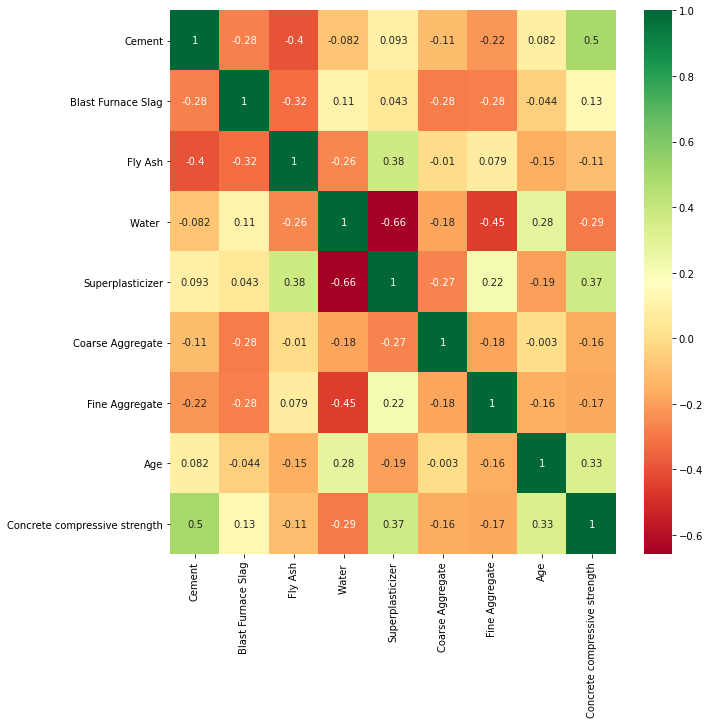

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(dflin.corr(),annot=True,cmap='RdYlGn')

#### from the heatmap we can see that Coarse Aggregate,Fine Aggregate,Fly Ash are weakly negatively correlated so i'm removing those columns along with extracting my independent variable

#### Now in the next step I'm extracting the "y" variable and "X" variable and dropping some columns

In [43]:
X = dflin.drop(['Concrete compressive strength','Coarse Aggregate','Fine Aggregate','Fly Ash'],axis=1)
y = dflin['Concrete compressive strength']

In [44]:
X.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Age
0,540.0,0.0,162.0,2.5,28
1,540.0,0.0,162.0,2.5,28
2,332.5,142.5,228.0,0.0,270
3,332.5,142.5,228.0,0.0,365
4,198.6,132.4,192.0,0.0,360


In [45]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength, dtype: float64

In [46]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### In the next step i'm adding constant and doing the OLS 

In [64]:

X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.584
Model:                                       OLS   Adj. R-squared:                  0.582
Method:                            Least Squares   F-statistic:                     287.8
Date:                           Sun, 02 May 2021   Prob (F-statistic):          2.86e-192
Time:                                   16:21:31   Log-Likelihood:                -3909.3
No. Observations:                           1030   AIC:                             7831.
Df Residuals:                               1024   BIC:                             7860.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

#### From the above result we can see that all the p-values are below the sinificance level (0.05)

#### In the next step I dont need constant column for sklearn package so that is been dropped

In [56]:
X=X2.drop('const',axis=1) 
X.head()

,Cement,Blast Furnace Slag,Water,Superplasticizer,Age
0,540.0,0.0,162.0,2.5,28
1,540.0,0.0,162.0,2.5,28
2,332.5,142.5,228.0,0.0,270
3,332.5,142.5,228.0,0.0,365
4,198.6,132.4,192.0,0.0,360


In [57]:
X2.head()

,const,Cement,Blast Furnace Slag,Water,Superplasticizer,Age
0,1.0,540.0,0.0,162.0,2.5,28
1,1.0,540.0,0.0,162.0,2.5,28
2,1.0,332.5,142.5,228.0,0.0,270
3,1.0,332.5,142.5,228.0,0.0,365
4,1.0,198.6,132.4,192.0,0.0,360


#### Here I'm splitting my data to train and test

In [58]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.49928116001908207

#### From the above 0.49928 is the test score for the train and test dataset , this shows the fitting between the train and test data.

In [60]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) #R square value 
print(mean_squared_error(y_test,y_pred)) #Mean square of error
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE- square root of mean square error and also show by how much percentage where my predication can go wrong

0.49928116001908207
130.5355350401468
11.425214879386155


In [78]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4)# here i have done 4 fold since dataset is small

array([0.35363673, 0.13758306, 0.14211848, 0.54496233])

In [79]:

cross_val_score(LinearRegression(),X,y,cv=4).mean()# here i have done 4 fold since dataset is small , 

0.29457514898046816

#### from the above result 0.2945 is the mean of all the cross validation done

In [80]:
#dimensions of data
n = len(X_test)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
R2

0.49928116001908207

In [81]:
Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.48676318901955906


#### from the above R^ = .4992 and adjusted R^ = .4867 which show the there not much difference between both the values and it also shows that features i.e the variables selected for modelling is relavant to each other.

In [82]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [83]:
model.intercept_

35.49187209733101

In [84]:
model.coef_

array([ 0.08129073,  0.06012982, -0.19701041,  0.61385187,  0.10926239])

#### Conclusion 
     
       
 Concrete compressive strength =35.491 +.0812 * Cement 0.0601 *Blast Furnace Slag -0.197 * Water 0.614 * Superplasticizer *.109* Age .
 
 
 the model is weak because k fold R^2 value is very low. may be a different model will be better to predict the output variables.
